In [ ]:
!pip install tensorflow opencv-python numpy matplotlib scikit-learn keras mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Inicializa o detector MTCNN
detector = MTCNN()

def detect_faces(image):
    # Detecta faces na imagem
    faces = detector.detect_faces(image)
    return faces

def draw_faces(image, faces):
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image

In [ ]:
# Carrega o modelo FaceNet do TensorFlow Hub
facenet_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5", input_shape=(224, 224, 3))

# Cria uma camada densa para reduzir a dimensionalidade para 128
dense_layer = Dense(128, activation='relu')

def preprocess_face(face_pixels):
    # Redimensiona a face para o tamanho esperado pelo modelo
    face_pixels = cv2.resize(face_pixels, (224, 224))

    # Normaliza os pixels da face
    face_pixels = face_pixels.astype('float32') / 255.0
    return face_pixels

def get_face_embedding(face_pixels):
    # Pré-processa a face
    face_pixels = preprocess_face(face_pixels)

    # Expande as dimensões para o formato esperado pelo modelo
    samples = np.expand_dims(face_pixels, axis=0)

    # Gera o embedding usando o modelo do TensorFlow Hub
    embedding = facenet_model(samples)

    # Aplica a camada densa para reduzir a dimensionalidade
    reduced_embedding = dense_layer(embedding)

    return reduced_embedding.numpy()[0]

Saving pessas.png to pessas (1).png


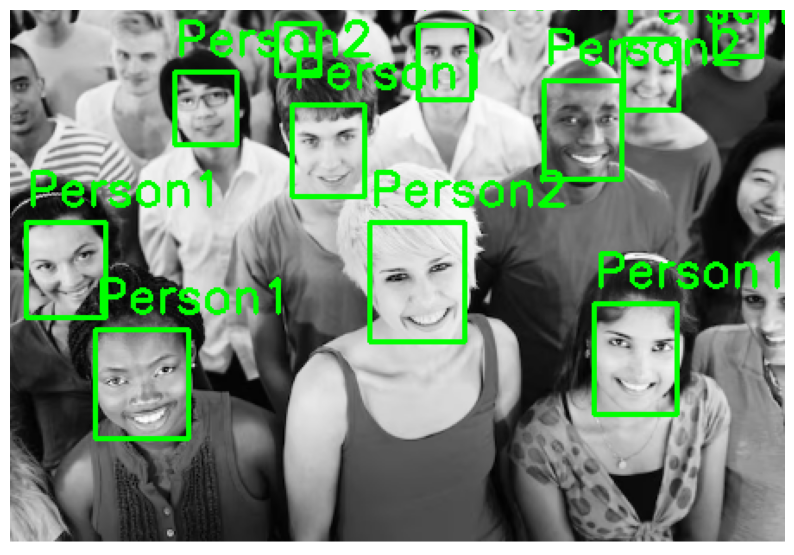

In [ ]:
from google.colab import files
from IPython.display import Image, display

# Upload de uma imagem
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Carrega a imagem
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reconhece as faces
result = recognize_faces(image)

# Mostra o resultado
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
from IPython.display import Image, display

# Upload de uma imagem
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Carrega a imagem
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reconhece as faces
result = recognize_faces(image)

# Mostra o resultado
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis('off')
plt.show()

Saving VID_20250222_123935971.mp4 to VID_20250222_123935971.mp4


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
